In [4]:
!pip install -q openmeteo-requests
!pip install -q requests-cache retry-requests numpy pandas

In [5]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 11.9338,
	"longitude": 79.8298,
	"start_date": "2020-05-01",
	"end_date": "2024-05-01",
	"daily": ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "apparent_temperature_max", "apparent_temperature_min", "apparent_temperature_mean", "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum", "et0_fao_evapotranspiration"],
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(2).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(3).ValuesAsNumpy()
daily_apparent_temperature_max = daily.Variables(4).ValuesAsNumpy()
daily_apparent_temperature_min = daily.Variables(5).ValuesAsNumpy()
daily_apparent_temperature_mean = daily.Variables(6).ValuesAsNumpy()
daily_sunrise = daily.Variables(7).ValuesAsNumpy()
daily_sunset = daily.Variables(8).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(9).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(10).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(11).ValuesAsNumpy()
daily_rain_sum = daily.Variables(12).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(13).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(14).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(15).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(16).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(17).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(18).ValuesAsNumpy()
daily_et0_fao_evapotranspiration = daily.Variables(19).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["apparent_temperature_max"] = daily_apparent_temperature_max
daily_data["apparent_temperature_min"] = daily_apparent_temperature_min
daily_data["apparent_temperature_mean"] = daily_apparent_temperature_mean
# daily_data["sunrise"] = daily_sunrise
# daily_data["sunset"] = daily_sunset
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["precipitation_sum"] = daily_precipitation_sum
# daily_data["rain_sum"] = daily_rain_sum
# daily_data["snowfall_sum"] = daily_snowfall_sum
daily_data["precipitation_hours"] = daily_precipitation_hours
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
daily_data["et0_fao_evapotranspiration"] = daily_et0_fao_evapotranspiration

df = pd.DataFrame(data = daily_data)
df1=df

Coordinates 11.915641784667969°N 79.82959747314453°E
Elevation 8.0 m asl
Timezone b'Asia/Kolkata' b'IST'
Timezone difference to GMT+0 19800 s


In [6]:
df.head(10)

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2020-04-30 18:30:00+00:00,51.0,33.593498,26.893499,30.295584,39.531635,33.006100,35.602688,45205.054688,40608.187500,0.2,2.0,20.883102,45.719997,154.520401,24.070000,5.698069
1,2020-05-01 18:30:00+00:00,1.0,33.543499,27.443501,30.487246,39.089001,33.500668,35.879623,45238.535156,40728.187500,0.0,0.0,20.633371,45.000000,149.349380,23.850000,5.644699
2,2020-05-02 18:30:00+00:00,2.0,33.443501,27.643499,30.276833,39.054466,34.040894,35.664200,45271.664062,40967.703125,0.0,0.0,20.111729,44.639996,149.414871,24.610001,5.745195
3,2020-05-03 18:30:00+00:00,3.0,32.993500,26.643499,29.785166,38.806427,32.831459,34.903934,45304.414062,40970.257812,0.0,0.0,19.959721,43.560001,140.131210,24.969999,5.800085
4,2020-05-04 18:30:00+00:00,2.0,33.243500,26.843500,29.978914,38.389095,32.920547,34.828442,45336.757812,40972.820312,0.0,0.0,19.734436,40.680000,145.455734,24.750000,5.905911
5,2020-05-05 18:30:00+00:00,1.0,33.443501,26.393499,30.072670,38.704796,32.211040,35.160847,45368.656250,40735.609375,0.0,0.0,20.767975,44.639996,151.883575,23.900000,5.659791
6,2020-05-06 18:30:00+00:00,51.0,33.693501,27.293499,30.345581,39.274494,33.274109,35.599819,45400.085938,40737.492188,0.2,2.0,23.675303,49.680000,156.148346,23.780001,5.591854
7,2020-05-07 18:30:00+00:00,51.0,33.543499,27.743500,30.543503,38.857002,33.022564,35.217140,45431.007812,40860.015625,0.3,3.0,22.657131,46.079998,157.983871,24.070000,6.001576
8,2020-05-08 18:30:00+00:00,51.0,33.343498,27.843500,30.449751,39.156990,33.841450,35.814751,45461.390625,40862.273438,0.1,1.0,20.620804,42.839996,143.083817,24.299999,5.696887
9,2020-05-09 18:30:00+00:00,2.0,32.793499,27.193501,30.116415,39.206665,33.460461,35.786953,45491.203125,40864.535156,0.0,0.0,16.516901,37.799999,120.828957,24.200001,5.542491


In [22]:
# temp=df[df.weather_code==61.0].drop(['date','daylight_duration','sunshine_duration','wind_direction_10m_dominant','precipitation_sum','precipitation_hours','weather_code'],axis=1)
temp=df.drop(['date','daylight_duration','sunshine_duration','wind_direction_10m_dominant','precipitation_sum','precipitation_hours','weather_code'],axis=1)

<Figure size 2000x2000 with 0 Axes>

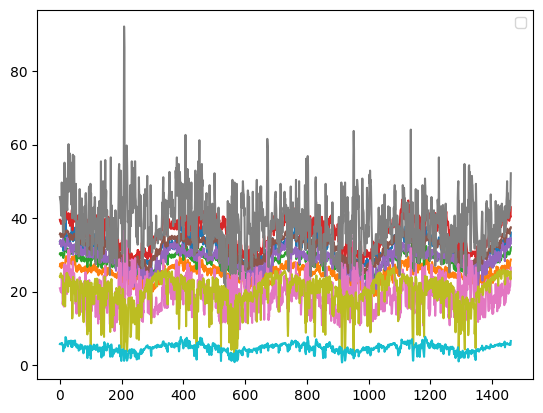

In [23]:
plt.figure(figsize=(20,20))
temp.plot(kind='line')
plt.legend([])
plt.show()

In [24]:
df.weather_code.unique()

array([51.,  1.,  2.,  3., 53., 61., 63., 55., 65.,  0.], dtype=float32)

In [25]:
temp.columns

Index(['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'apparent_temperature_mean', 'wind_speed_10m_max', 'wind_gusts_10m_max',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration'],
      dtype='object')

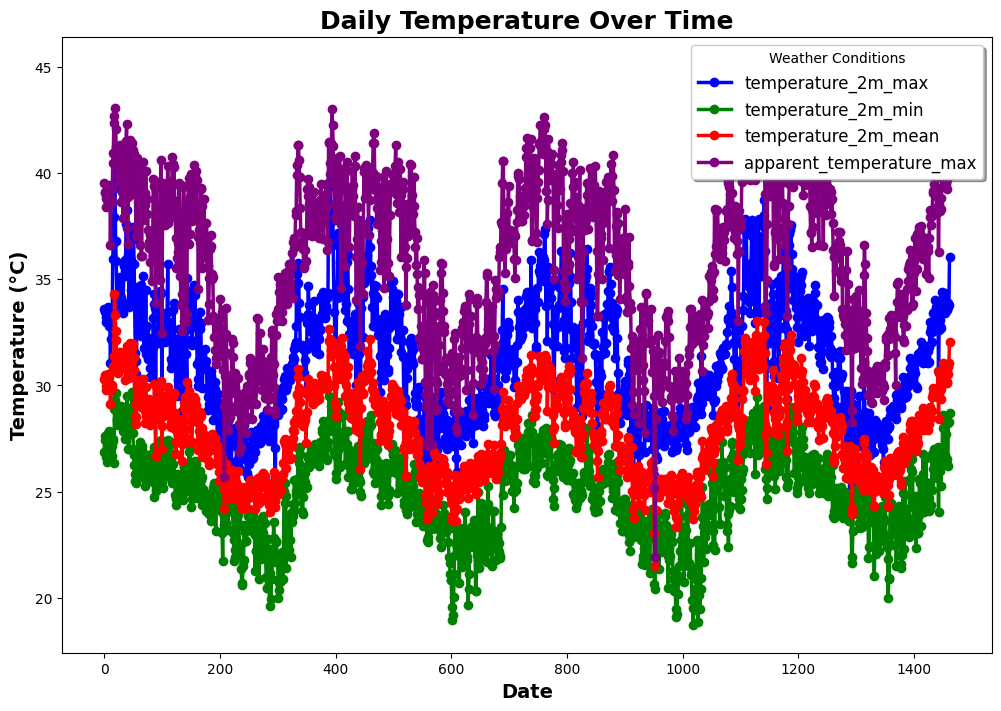

In [26]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Define a list of distinct colors for each line
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray']
colors = ['blue', 'green', 'red', 'purple']


# Plot the temperature data as a line chart with distinct colors and increased width
for i, (column, color) in enumerate(zip(temp.columns, colors)):
    temp[column].plot(kind='line', 
                      marker='o', 
                      linestyle='-', 
                      color=color, 
                      linewidth=2.5,  # Increase the width of the line
                      label=column)

# Add a legend with a custom label
plt.legend(loc='upper right', 
           fontsize=12, 
           frameon=True, 
           shadow=True, 
           title='Weather Conditions')

# Set the title and labels for the plot
plt.title('Daily Temperature Over Time', 
          fontsize=18, 
          fontweight='bold')
plt.xlabel('Date', 
           fontsize=14, 
           fontweight='bold')
plt.ylabel('Temperature (°C)', 
           fontsize=14, 
           fontweight='bold')

# Show the plot
plt.show()


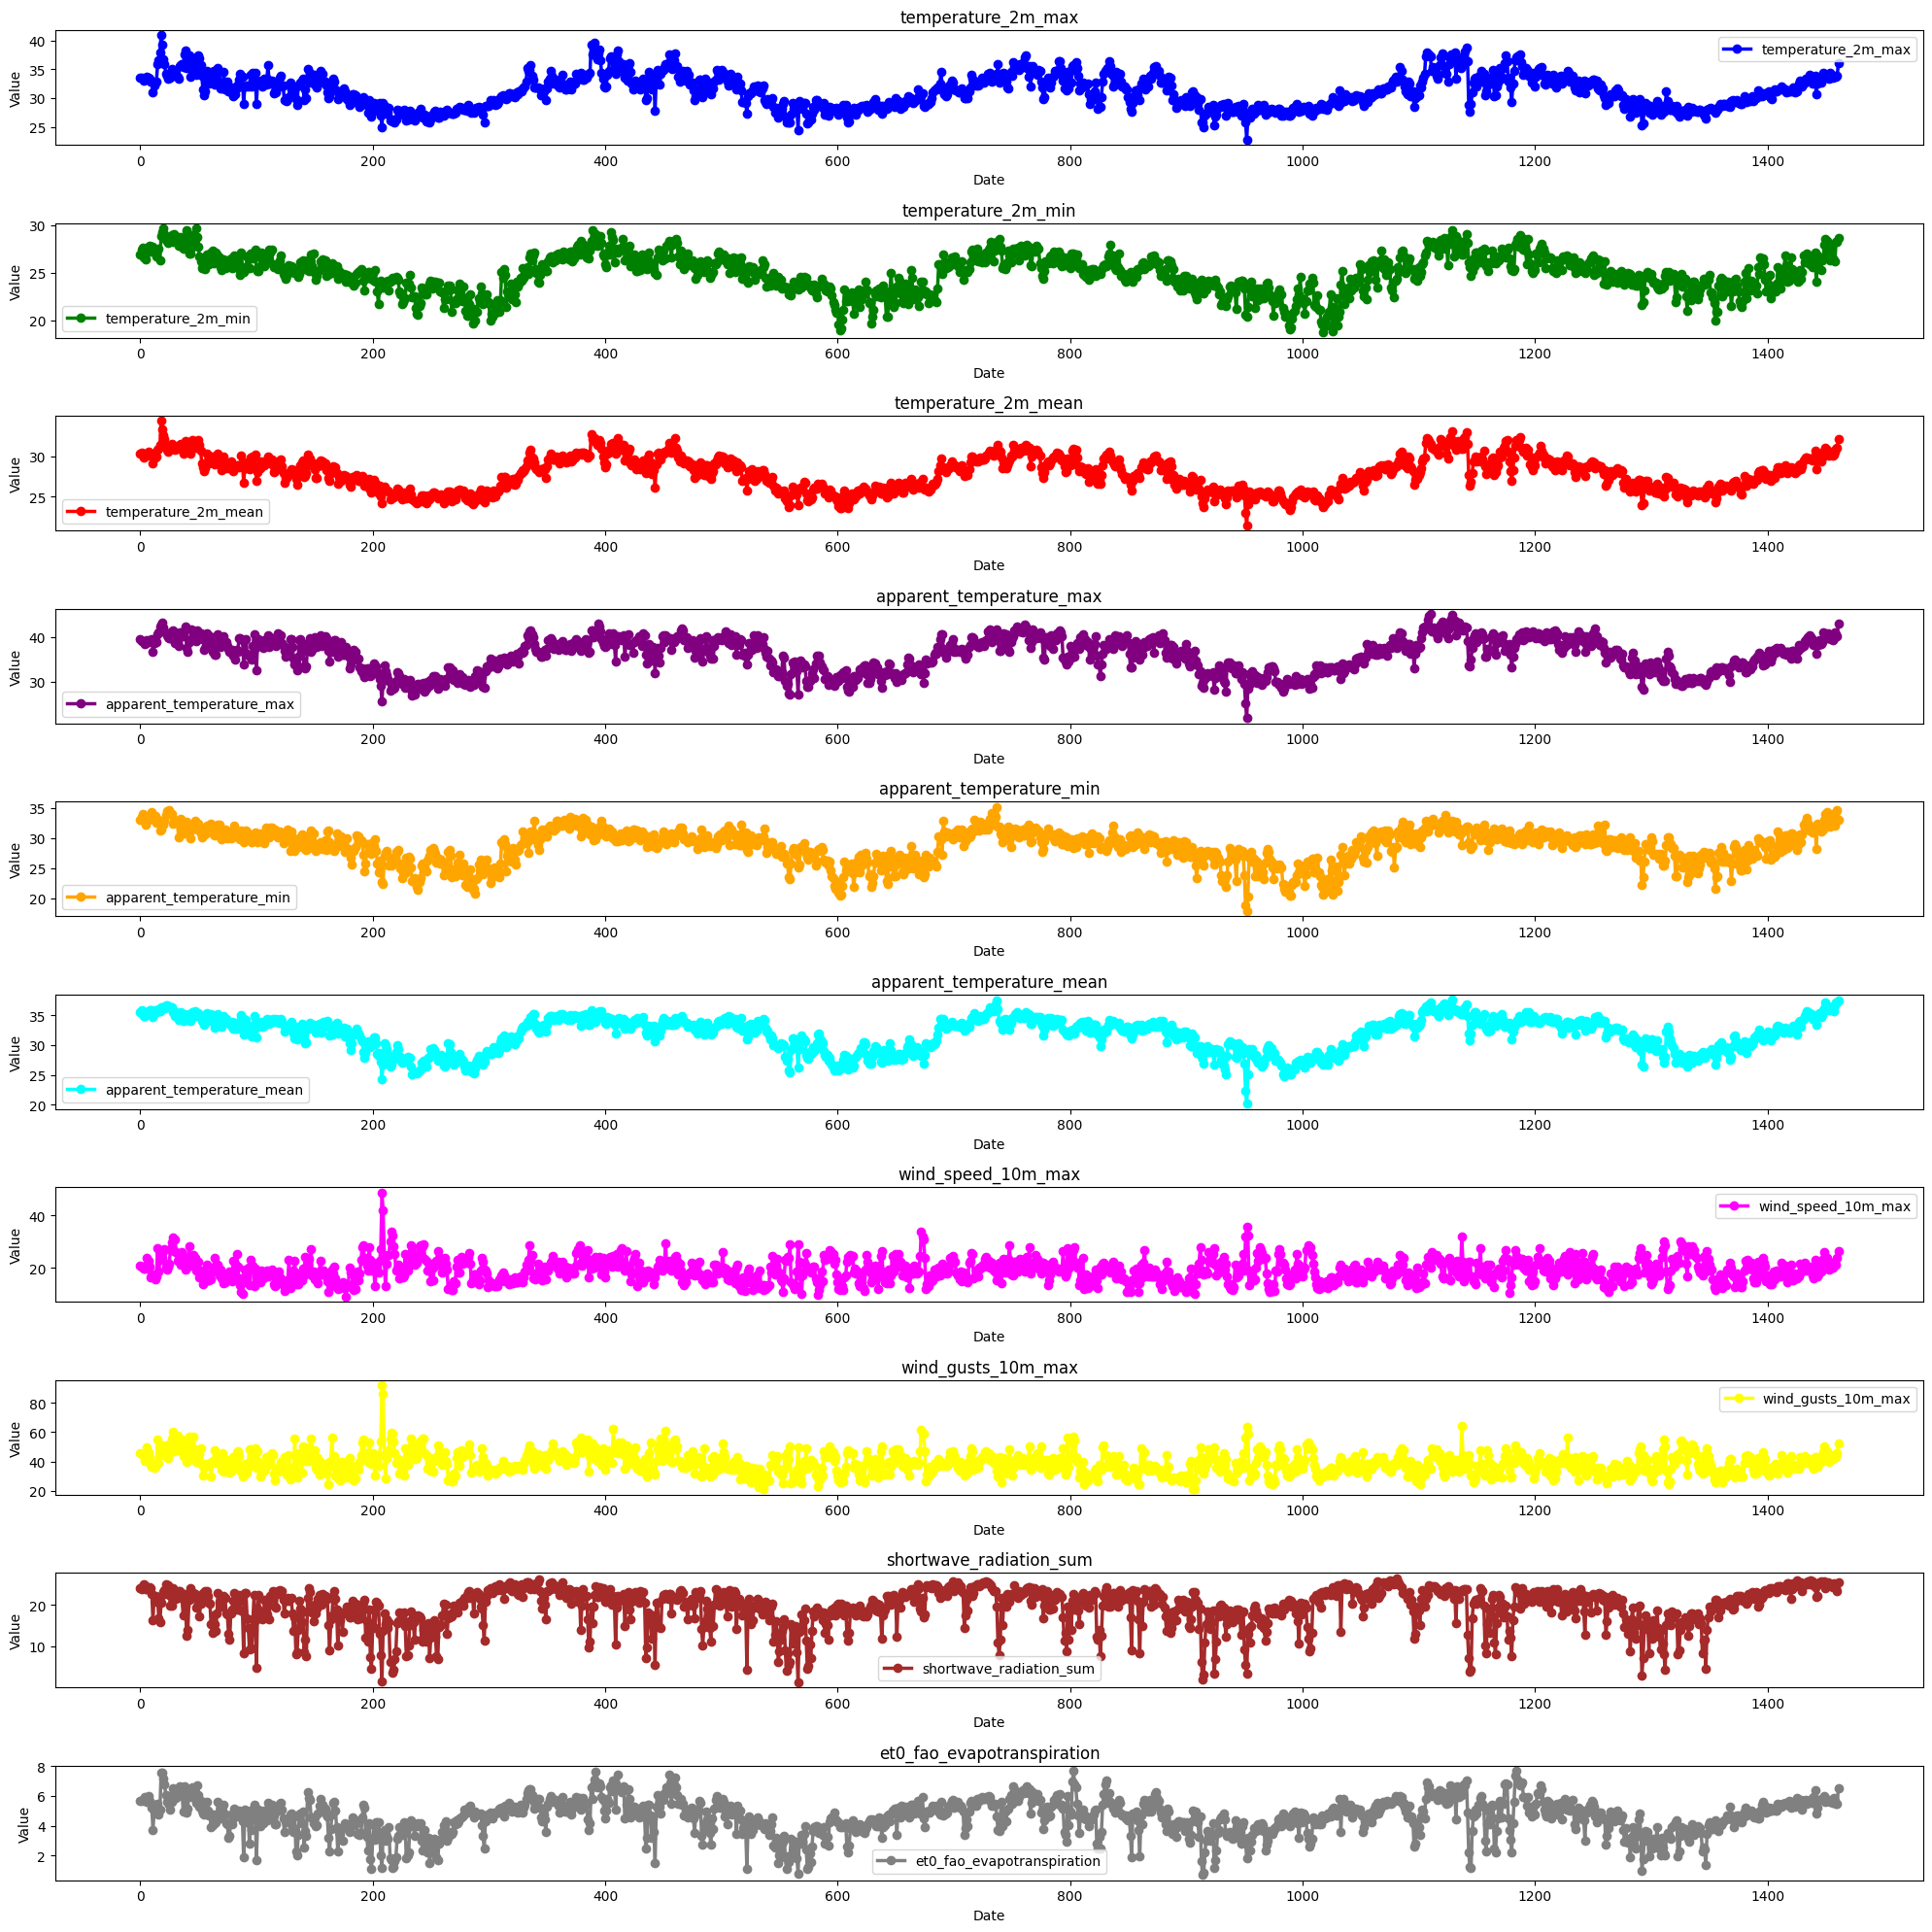

In [27]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(nrows=len(temp.columns), figsize=(20,20))

# Define a list of distinct colors for each line
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray']

# Plot each column in a separate subplot with distinct colors
for i, (column, color) in enumerate(zip(temp.columns, colors)):
    temp[column].plot(ax=axs[i], 
                      kind='line', 
                      marker='o', 
                      linestyle='-', 
                      color=color, 
                      linewidth=2.5,  # Increase the width of the line
                      label=column)
    
    axs[i].set_title(column)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Value')
    axs[i].legend()

# # Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

/tmp/ipykernel_33/2685929925.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'Week {int(x/7)+1}' for x in axs[i].get_xticks()])  # Convert days to weeks
/tmp/ipykernel_33/2685929925.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'Week {int(x/7)+1}' for x in axs[i].get_xticks()])  # Convert days to weeks
/tmp/ipykernel_33/2685929925.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'Week {int(x/7)+1}' for x in axs[i].get_xticks()])  # Convert days to weeks
/tmp/ipykernel_33/2685929925.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'Week {int(x/7)+1}' for x in axs[i].get_xticks()])  # Convert days to weeks
/tmp/ipykernel_33/2685929925.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'Week 

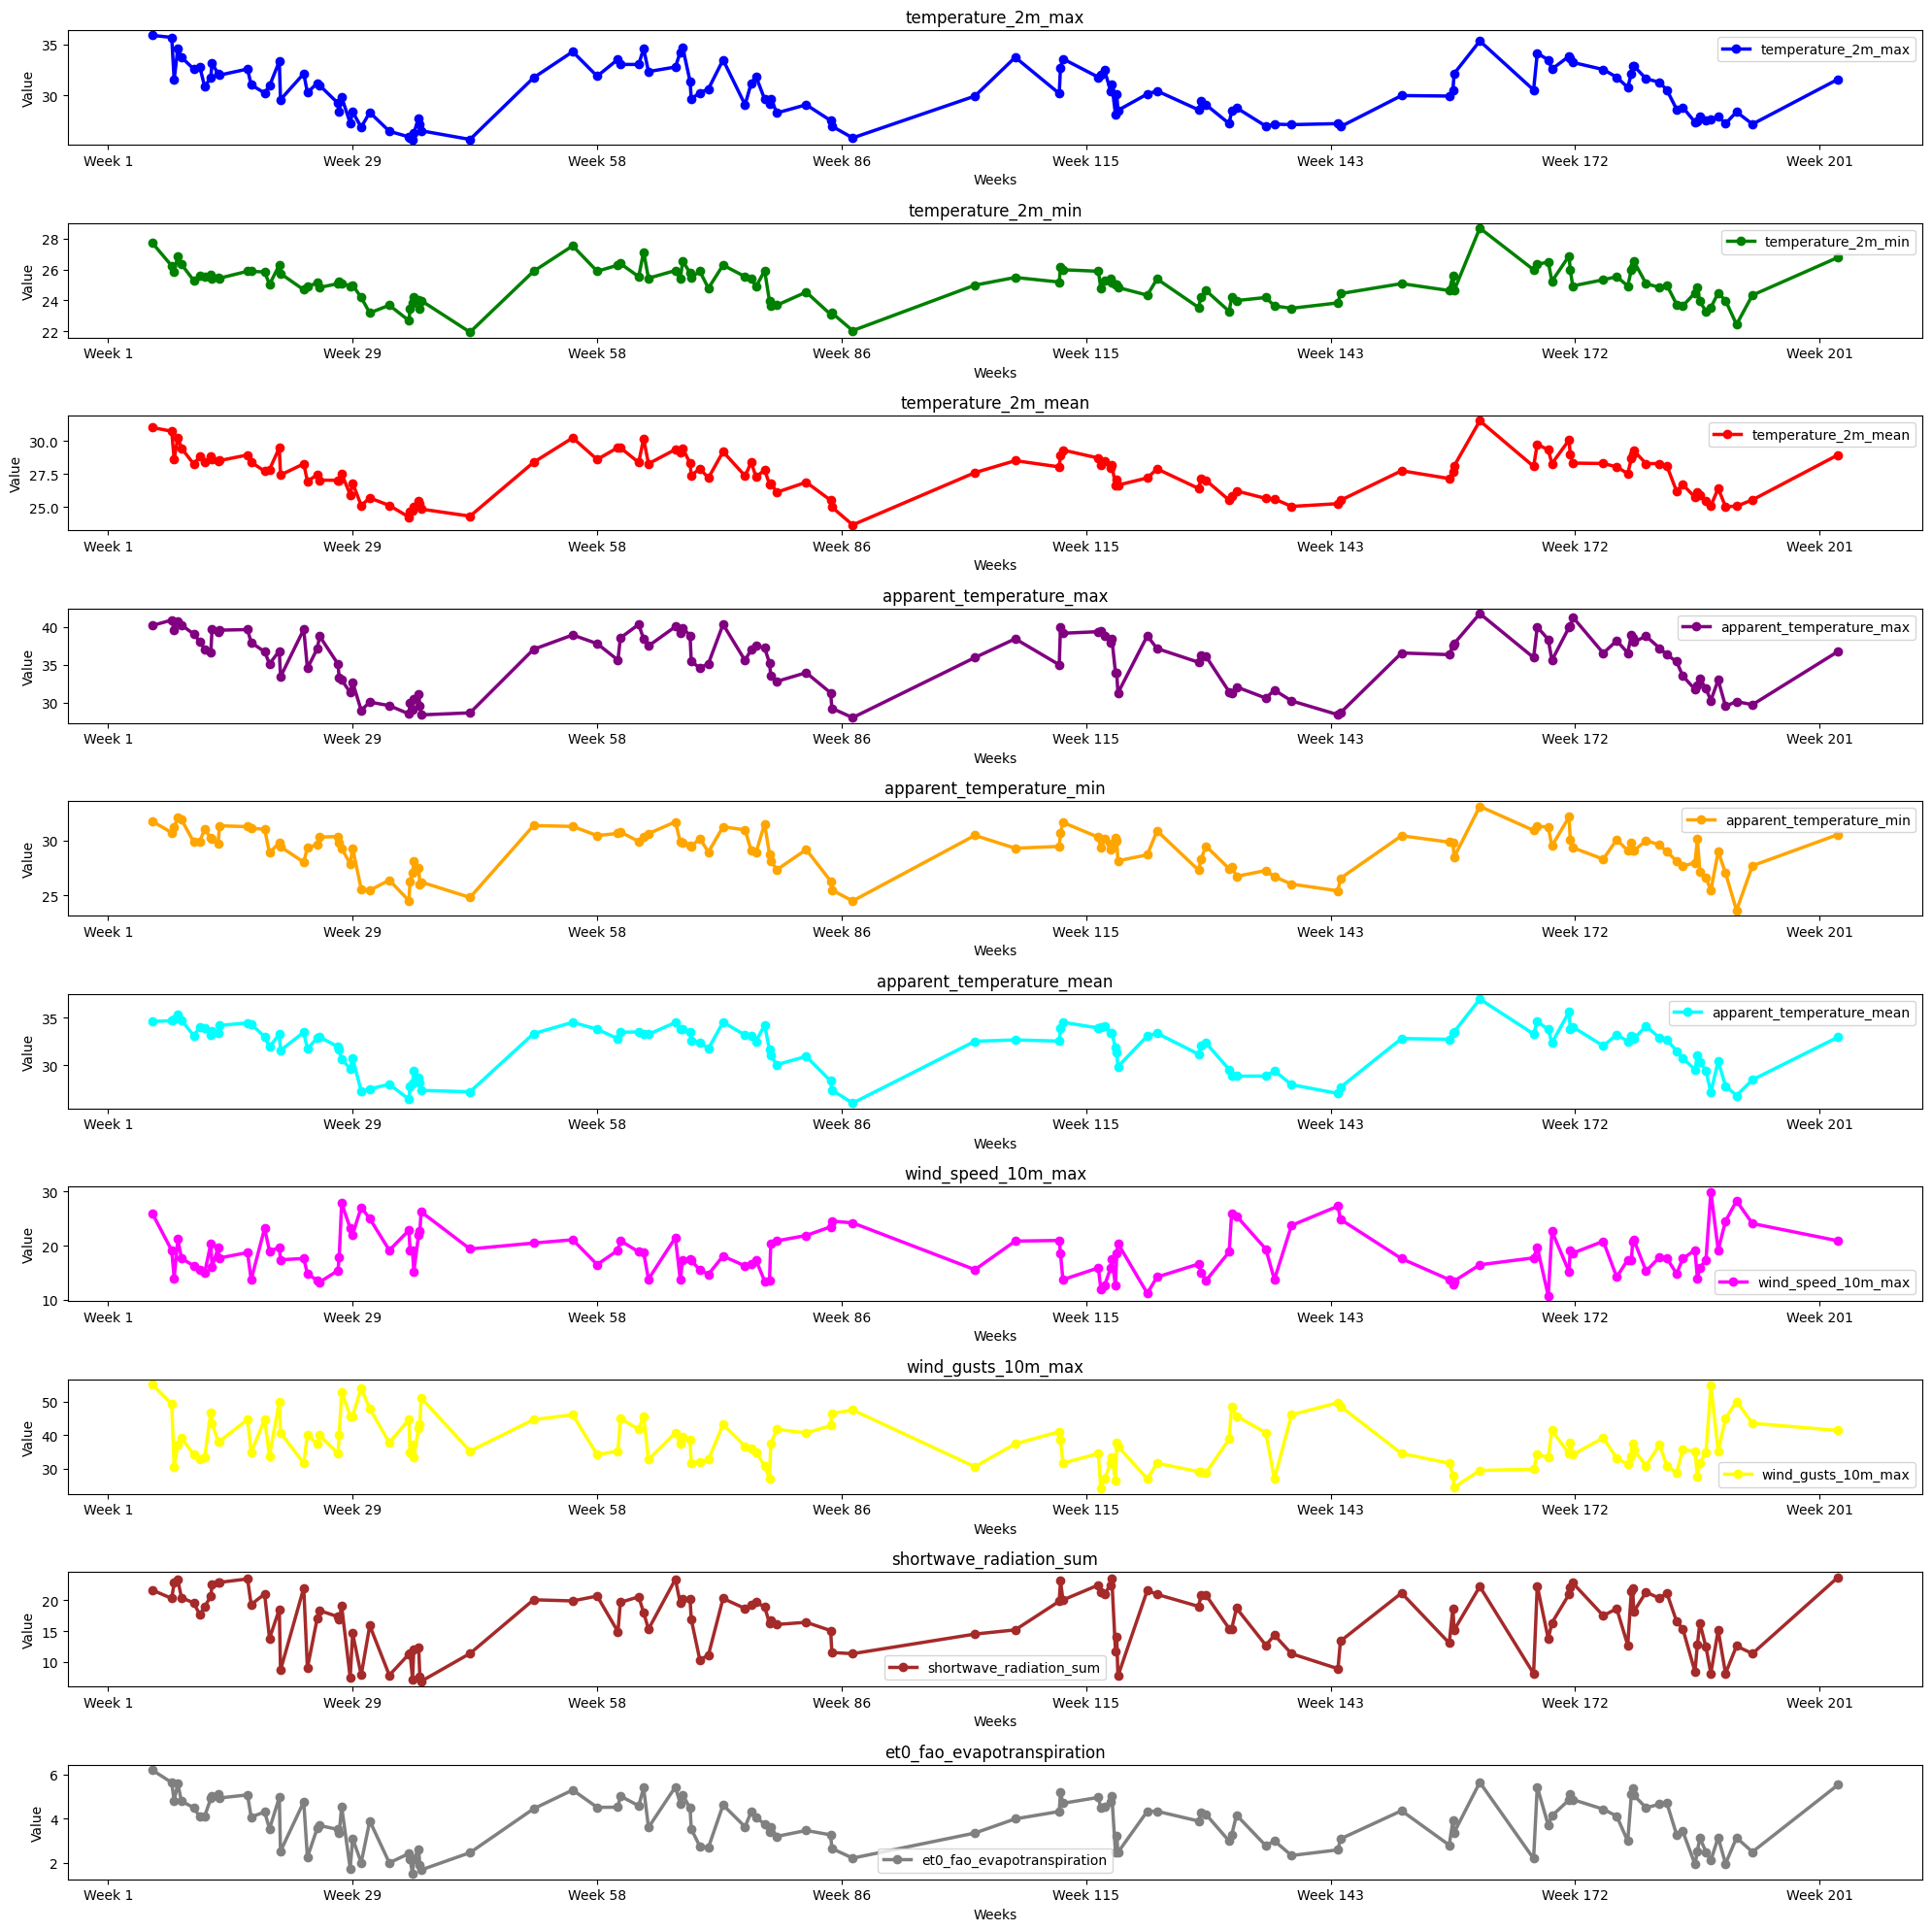

In [154]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(nrows=len(temp.columns), figsize=(20, 20))

# Define a list of distinct colors for each line
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray']

# Plot each column in a separate subplot with distinct colors
for i, (column, color) in enumerate(zip(temp.columns, colors)):
    temp[column].plot(ax=axs[i], 
                      kind='line', 
                      marker='o', 
                      linestyle='-', 
                      color=color, 
                      linewidth=2.5,  # Increase the width of the line
                      label=column)
    
    axs[i].set_title(column)
    axs[i].set_xlabel('Weeks')  # Set x-axis label to 'Weeks'
    axs[i].set_ylabel('Value')
    axs[i].legend()

    # Convert x-axis ticks to weeks
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer ticks
    axs[i].set_xticklabels([f'Week {int(x/7)+1}' for x in axs[i].get_xticks()])  # Convert days to weeks

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'DateFormatter'

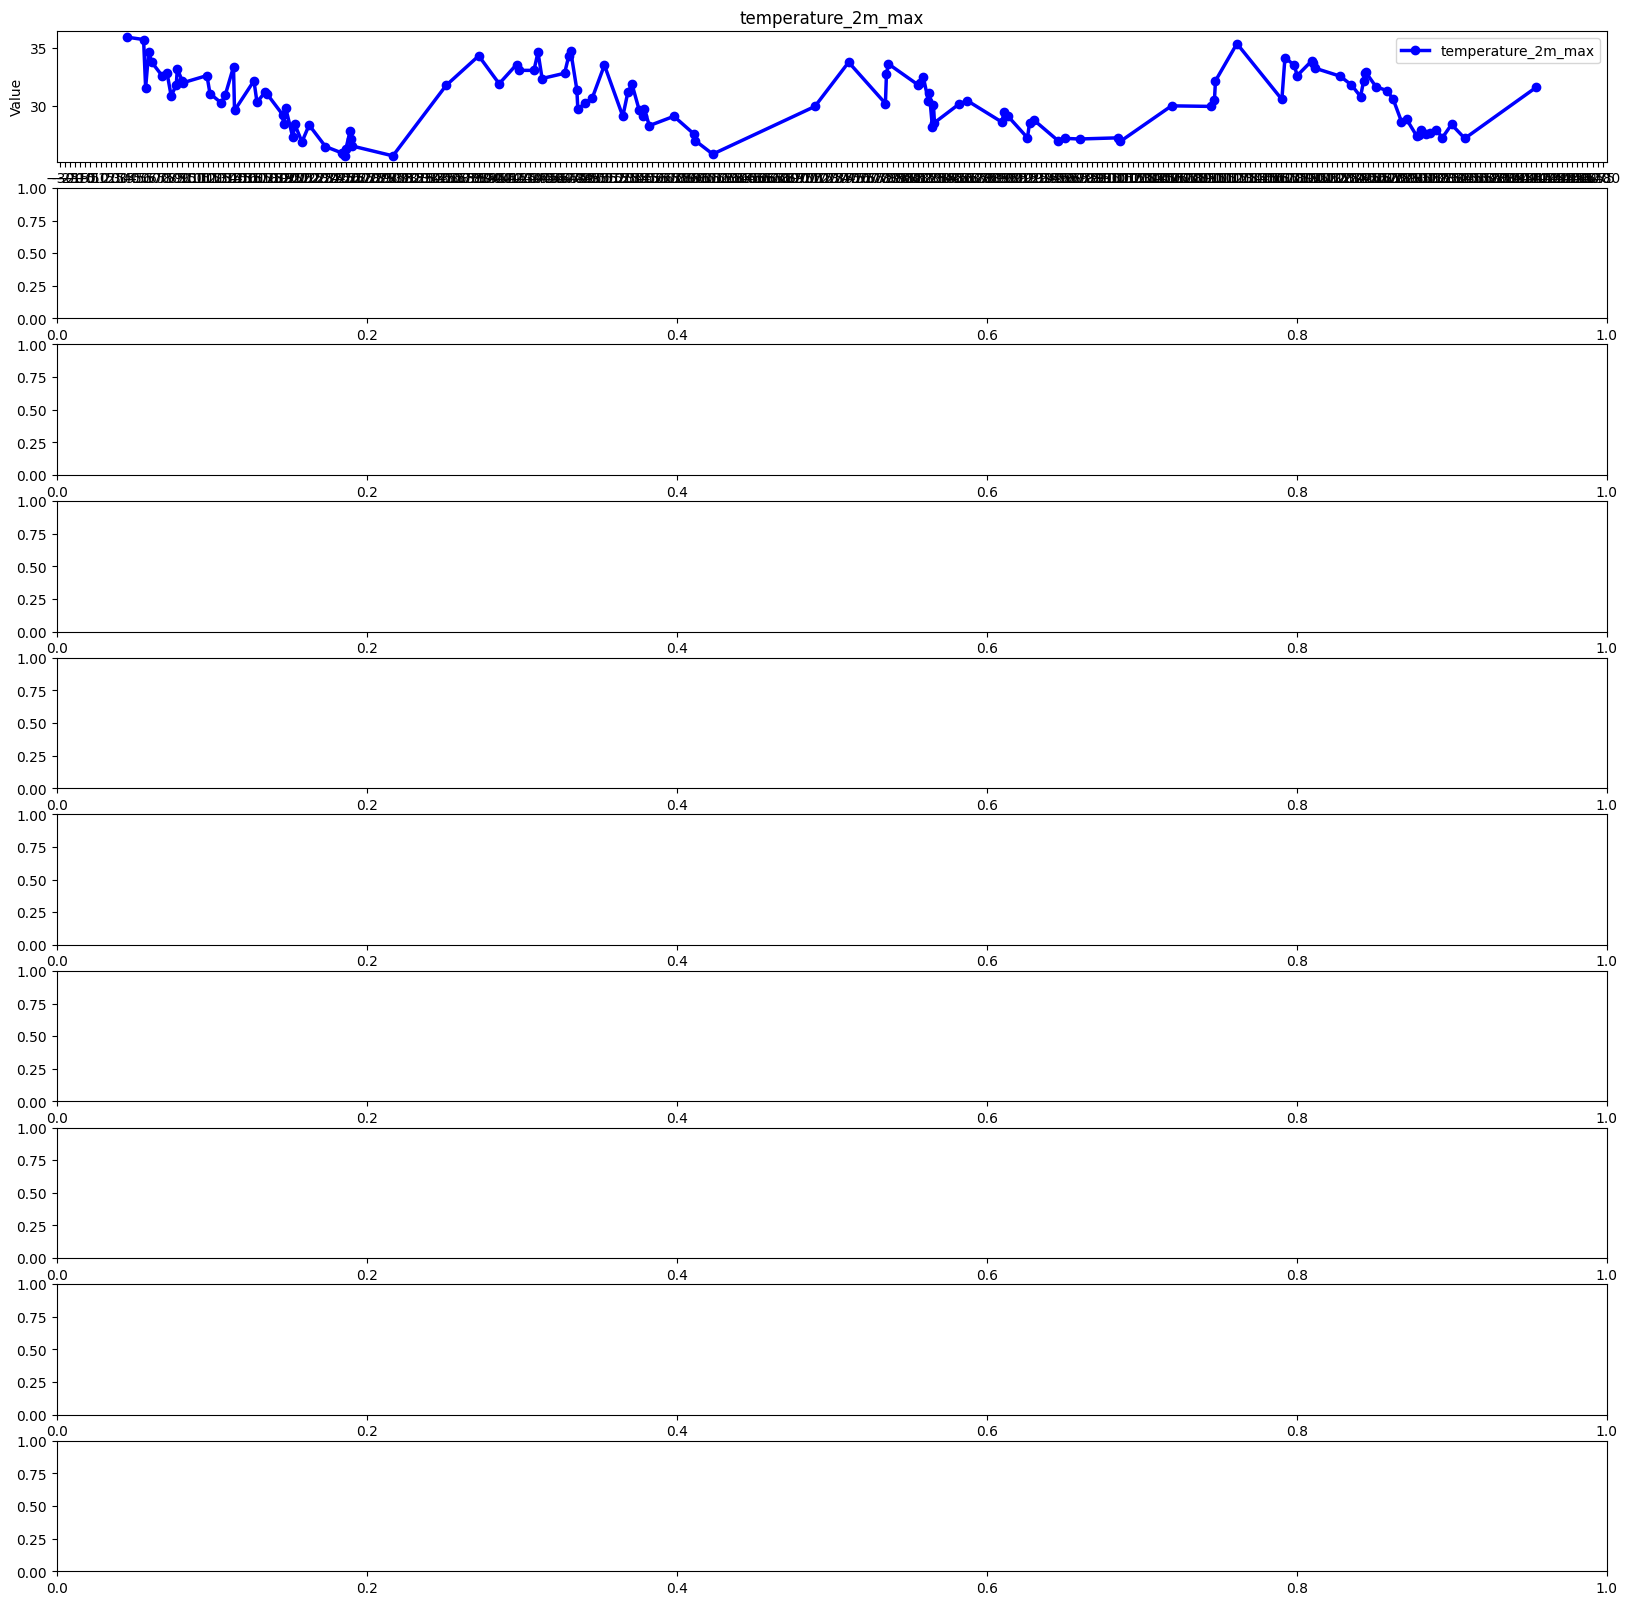

In [156]:
plt.show()

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have the DataFrame 'temp' with the specified columns
# Create a long-form DataFrame for ANOVA
temp_long = pd.melt(temp, var_name='feature', value_name='value')

# Fit the ANOVA model
model = ols('value ~ C(feature)', data=temp_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                  sum_sq       df             F  PR(>F)
C(feature)  1.285282e+06      9.0  10043.340272     0.0
Residual    2.077438e+05  14610.0           NaN     NaN


In [61]:
df.weather_code.value_counts().nunique()

10

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data Overview
# print(df.head())
print(df.info())
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   weather_code                 1462 non-null   float32
 1   temperature_2m_max           1462 non-null   float32
 2   temperature_2m_min           1462 non-null   float32
 3   temperature_2m_mean          1462 non-null   float32
 4   apparent_temperature_max     1462 non-null   float32
 5   apparent_temperature_min     1462 non-null   float32
 6   apparent_temperature_mean    1462 non-null   float32
 7   daylight_duration            1462 non-null   float32
 8   sunshine_duration            1462 non-null   float32
 9   precipitation_sum            1462 non-null   float32
 10  precipitation_hours          1462 non-null   float32
 11  wind_speed_10m_max           1462 non-null   float32
 12  wind_gusts_10m_max           1462 non-null   float32
 13  wind_direction_10m

In [30]:
## 2. Missing Values
df.isna().sum()

weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

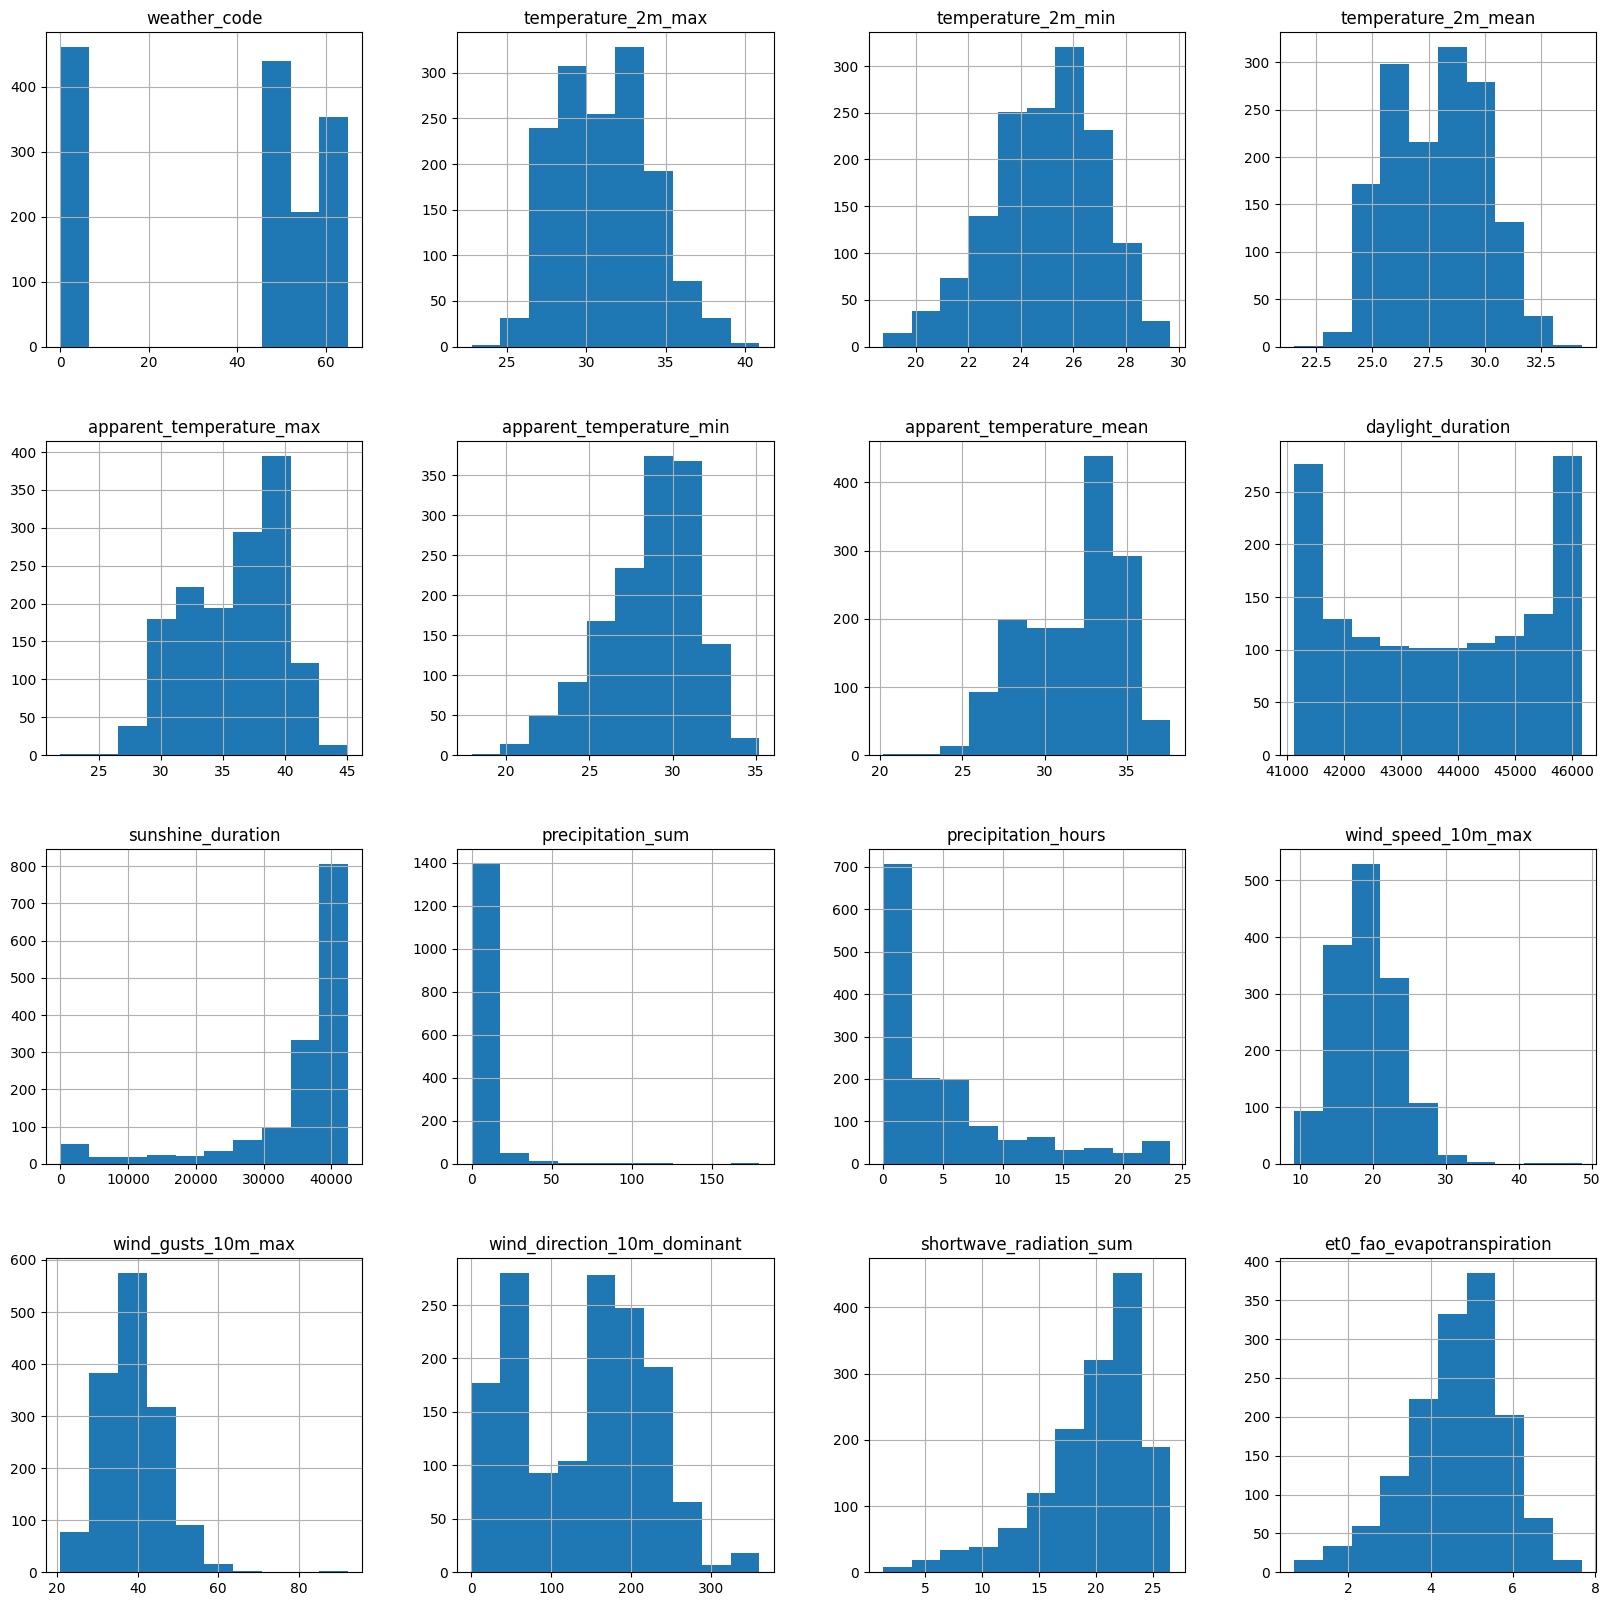

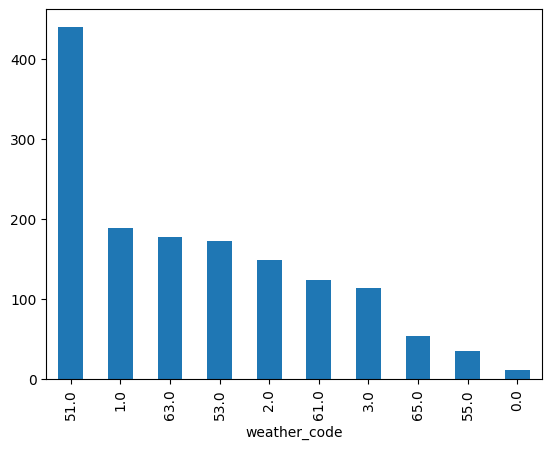

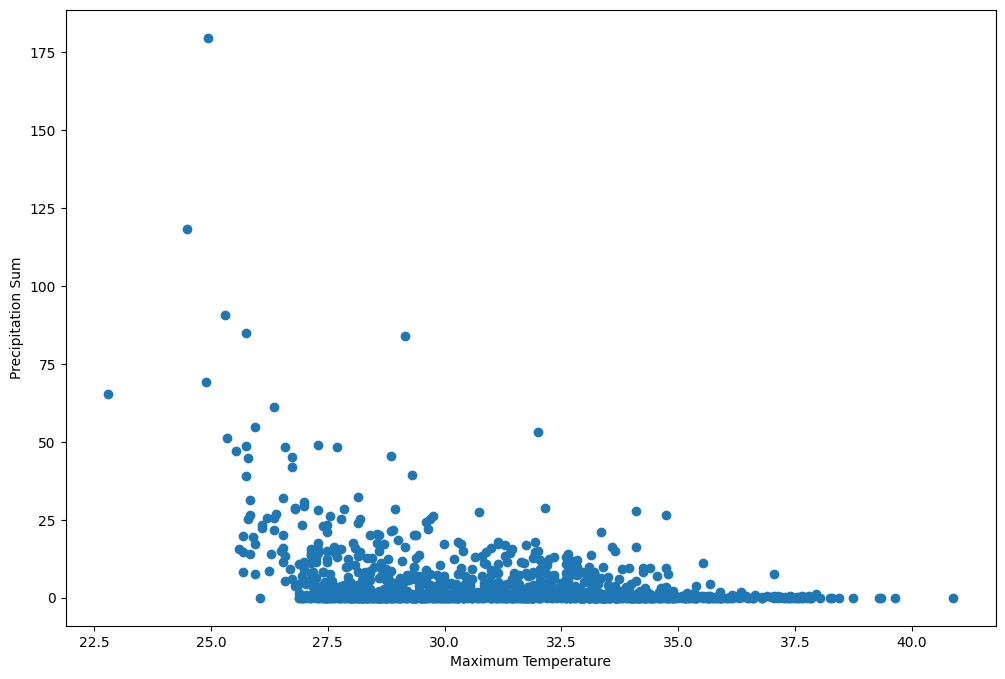

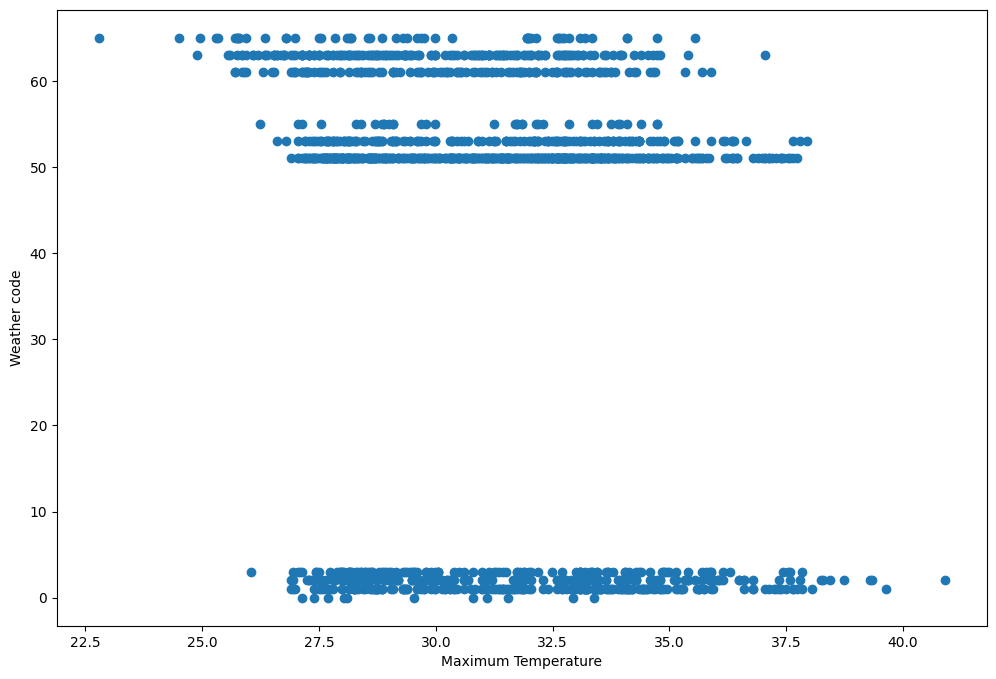

<Figure size 800x600 with 0 Axes>

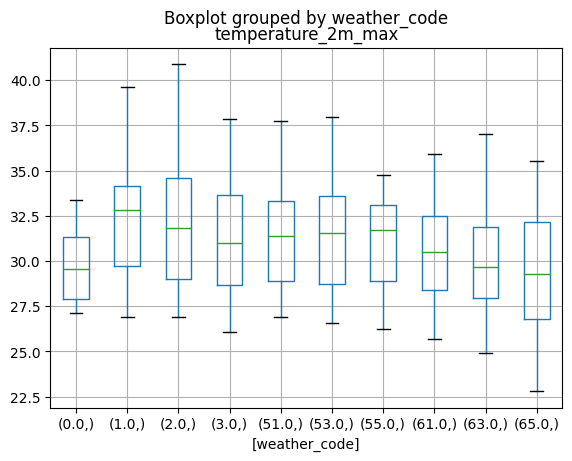

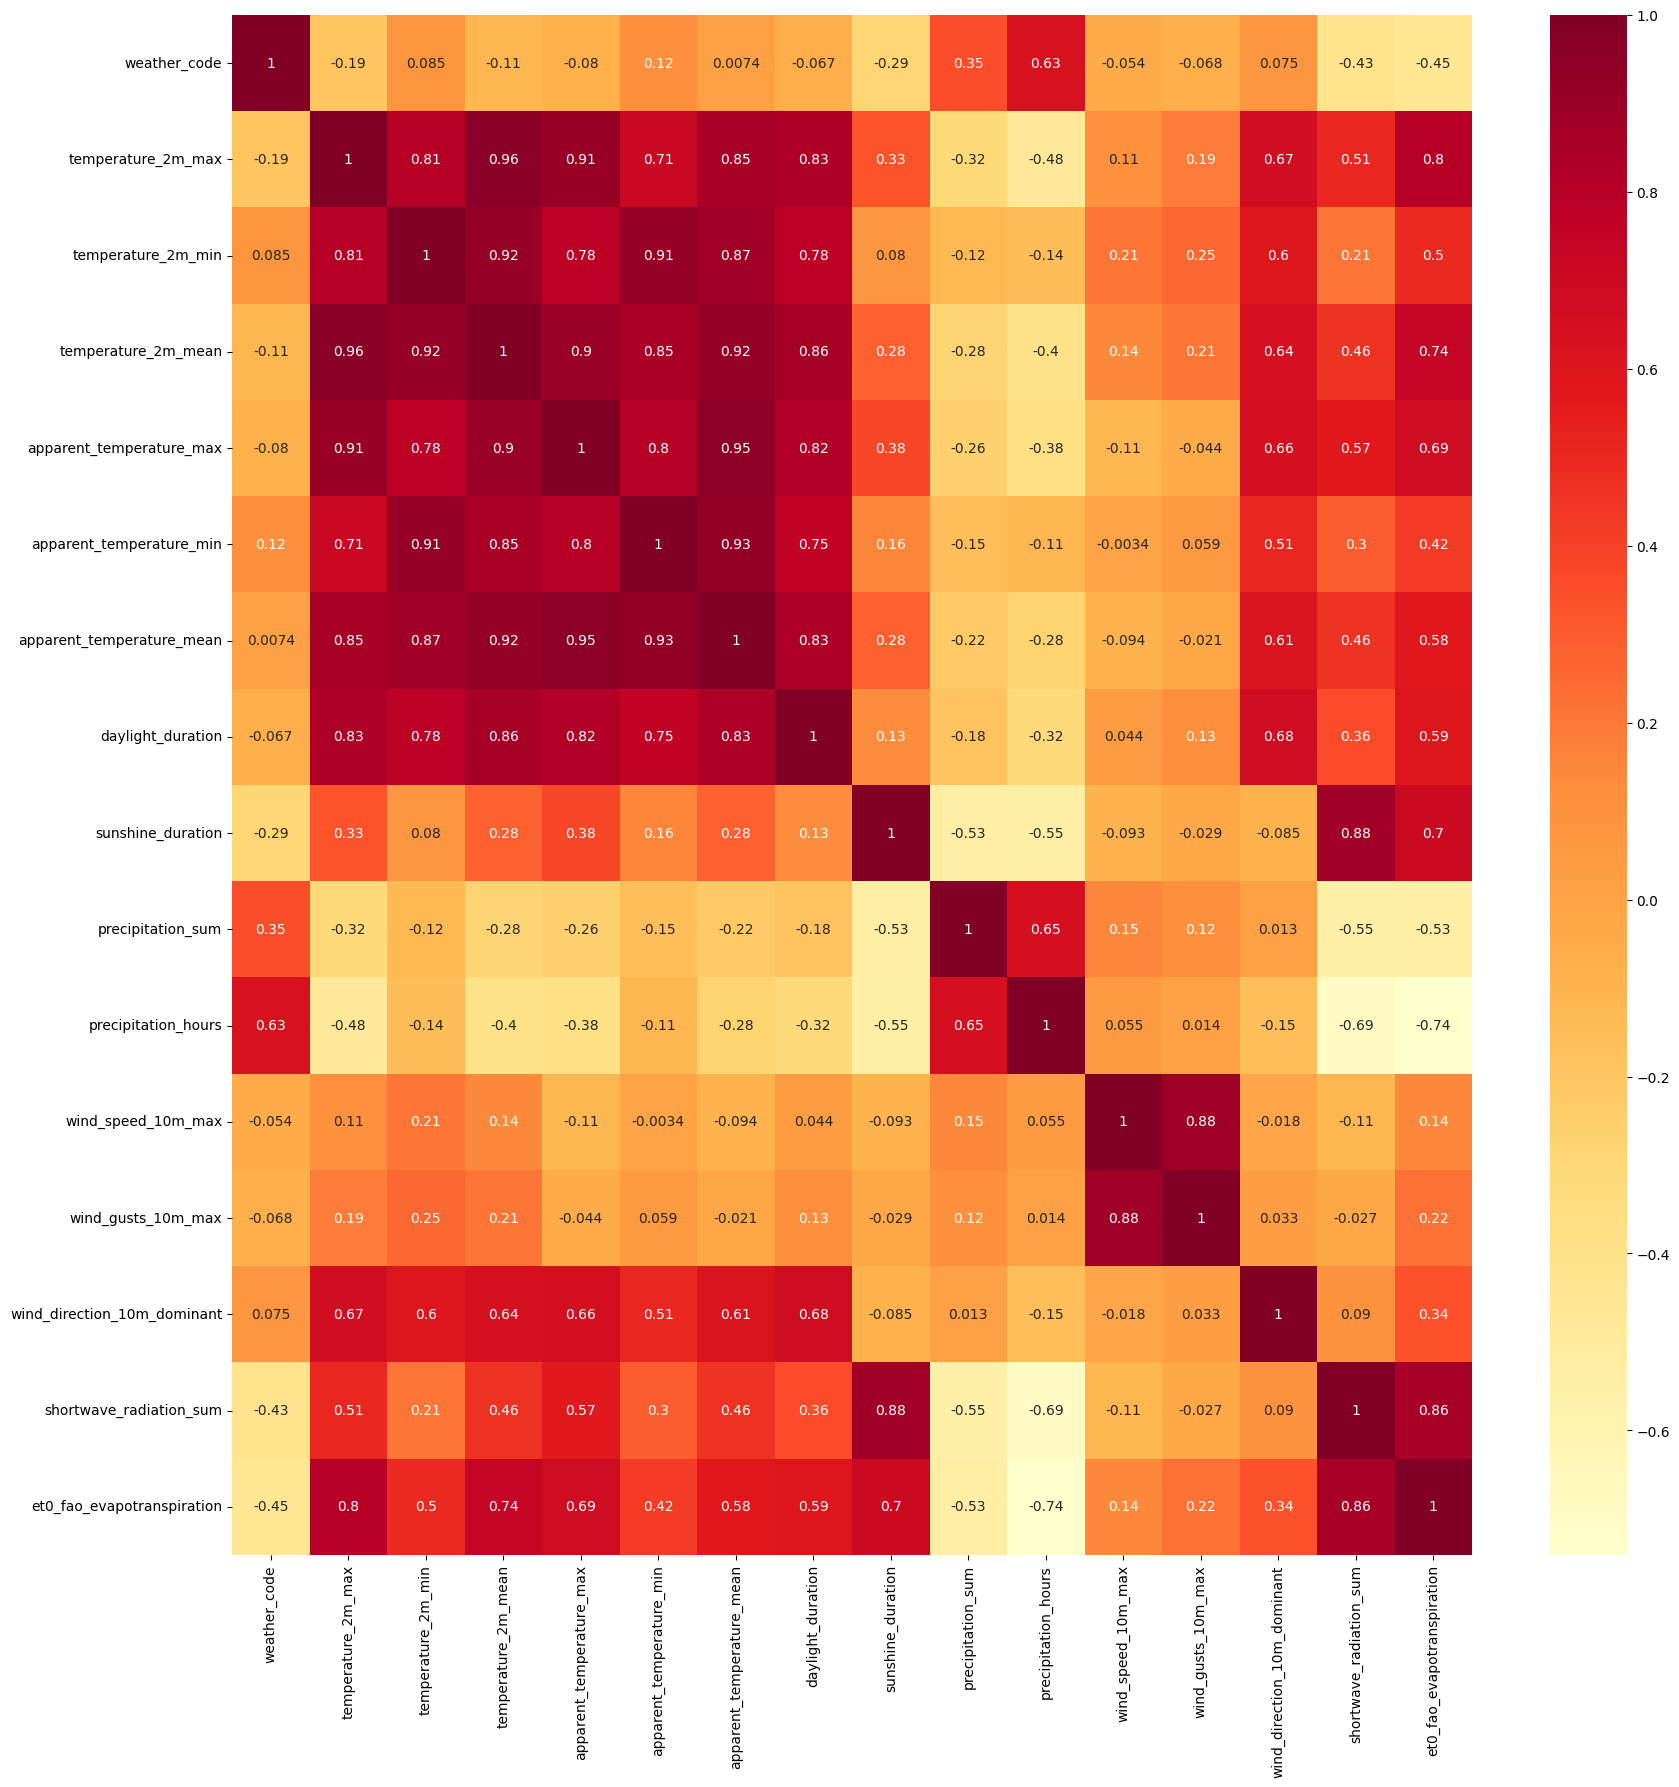

In [31]:
## 3. Univariate Analysis
# Drop the 'date' column if it exists
if 'date' in df.columns:
    df.drop(labels='date', inplace=True, axis=1)

# Histogram for numerical variables
df.hist(figsize=(20, 20))
plt.show()
# Bar plot for categorical variables
df['weather_code'].value_counts().plot(kind='bar')
plt.show()

## 4. Bivariate Analysis
# Scatter plot for numerical variables
plt.figure(figsize=(12, 8))
plt.scatter(df['temperature_2m_max'], df['precipitation_sum'])
plt.xlabel('Maximum Temperature')
plt.ylabel('Precipitation Sum')
plt.show()

# Scatter plot for numerical variables
plt.figure(figsize=(12, 8))
plt.scatter(df['temperature_2m_max'], df['weather_code'])
plt.xlabel('Maximum Temperature')
plt.ylabel('Weather code')
plt.show()

# Box plot for numerical variables by category
plt.figure(figsize=(8, 6))
df.boxplot(column=['temperature_2m_max'], by=['weather_code'])
plt.show()

## 5. Correlation Analysis
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.show()